# Predicting Type of Cancer by Gene Expression

**Task Description:**  
Training a machine learning model to classify the cancer patients to AML or ALL cancer patients in using the train_dataset, then predict the cancer type of new patients using their profiles of gene expression in the test_dataset and calculate the perdiction model accuracy and precision.  
**Data Description:**  
The train_dataset (gene expression for 7129 genes of 38 cancer patients) and test_dataset (gene expression for 7129 genes of 34 cancer patients) were downloaded from kaggle, you can view the data details and/or download them through this [link](https://www.kaggle.com/datasets/crawford/gene-expression/data)

#### iPython Notebook Sections
1. Import required libraries
2. Data loading and preprocessing
   1. Load actual dataset and encode AML and ALL cancer types to binary numeric values
   2. Load train dataset and test dataset
   3. Preprocessing of train and test datasets
3. Logistic regression model building, training and prediction
4. Evaluation of classification model

#### First Section: Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

#### Second Section: data load and preprossing

**2.1: load actual dataset and encode AML and ALL cancer types to binary numeric values**

In [2]:
actual_dataset = pd.read_csv("/Users/HASAN/Desktop/machine learning projects/cancer type prediction/data set/actual.csv")
print("The actual data matrix dimensions are", actual_dataset.shape)
print("The first five rows of actual data file are:")
actual_dataset.head()


The actual data matrix dimensions are (72, 2)
The first five rows of actual data file are:


,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [3]:
print("Number of each of ALL and AML patients in the actual data set are:\n", actual_dataset['cancer'].value_counts(), sep='')

Number of each of ALL and AML patients in the actual data set are:
ALL    47
AML    25
Name: cancer, dtype: int64


In [4]:
# code labels to numeric (AML to 1 and ALL to 0)
labels = ['AML', 'ALL']
actual_dataset = actual_dataset.replace({labels[0]: 1, labels[1]: 0})

**2.2: load train dataset and test dataset**

In [5]:
train_data = pd.read_csv("/Users/HASAN/Desktop/machine learning projects/cancer type prediction/data set/data_set_ALL_AML_train.csv")
print("Train dataset shape is", train_data.shape)
test_data = pd.read_csv("/Users/HASAN/Desktop/machine learning projects/cancer type prediction/data set/data_set_ALL_AML_independent.csv")
print("Test dataset shape is", test_data.shape)

Train dataset shape is (7129, 78)
Test dataset shape is (7129, 70)


In [6]:
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [7]:
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


**2.3: Preprocessing of train and test datasets**

In [8]:
# Remove "call" columns from training and testing data
train_to_keep = [col for col in train_data.columns if "call" not in col]
test_to_keep = [col for col in test_data.columns if "call" not in col]

X_train_tr = train_data[train_to_keep]
X_test_tr = test_data[test_to_keep]

In [9]:
train_columns_titles = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', 
                        '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

X_train_tr = X_train_tr.reindex(columns=train_columns_titles)

In [10]:
test_columns_titles = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
                       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
                       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

X_test_tr = X_test_tr.reindex(columns=test_columns_titles)

In [11]:
X_train = X_train_tr.T
X_test = X_test_tr.T


In [12]:
# Clean up the column names for training and testing data
X_train.columns = X_train.iloc[1]
X_train = X_train.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

# Clean up the column names for Testing data
X_test.columns = X_test.iloc[1]
X_test = X_test.drop(["Gene Description", "Gene Accession Number"]).apply(pd.to_numeric)

print(X_train.shape)
print(X_test.shape)
X_train.head()


(38, 7129)
(34, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [13]:
X_train = X_train.reset_index(drop=True)
X_train.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [14]:
y_train = actual_dataset[actual_dataset.patient <= 38].reset_index(drop=True)
y_train.head()

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [15]:
X_test = X_test.reset_index(drop=True)
y_test = actual_dataset[actual_dataset.patient > 38].reset_index(drop=True)
y_test.head()

,patient,cancer
0,39,0
1,40,0
2,41,0
3,42,0
4,43,0


In [16]:
X_train.describe()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,-120.868421,-150.526316,-17.157895,181.394737,-276.552632,-439.210526,-43.578947,-201.184211,99.052632,112.131579,...,178.763158,750.842105,8.815789,399.131579,-20.052632,869.052632,335.842105,19.210526,504.394737,-29.210526
std,109.555656,75.734507,117.686144,117.468004,111.004431,135.458412,219.482393,90.838989,83.178397,211.815597,...,84.826830,298.008392,77.108507,469.579868,42.346031,482.366461,209.826766,31.158841,728.744405,30.851132
min,-476.000000,-327.000000,-307.000000,-36.000000,-541.000000,-790.000000,-479.000000,-463.000000,-82.000000,-215.000000,...,30.000000,224.000000,-178.000000,36.000000,-112.000000,195.000000,41.000000,-50.000000,-2.000000,-94.000000
25%,-138.750000,-205.000000,-83.250000,81.250000,-374.250000,-547.000000,-169.000000,-239.250000,36.000000,-47.000000,...,120.000000,575.500000,-42.750000,174.500000,-48.000000,595.250000,232.750000,8.000000,136.000000,-42.750000
50%,-106.500000,-141.500000,-43.500000,200.000000,-263.000000,-426.500000,-33.500000,-185.500000,99.500000,70.500000,...,174.500000,700.000000,10.500000,266.000000,-18.000000,744.500000,308.500000,20.000000,243.500000,-26.000000
75%,-68.250000,-94.750000,47.250000,279.250000,-188.750000,-344.750000,79.000000,-144.750000,152.250000,242.750000,...,231.750000,969.500000,57.000000,451.750000,9.250000,1112.000000,389.500000,30.250000,487.250000,-11.500000
max,17.000000,-20.000000,265.000000,392.000000,-51.000000,-155.000000,419.000000,-24.000000,283.000000,561.000000,...,356.000000,1653.000000,218.000000,2527.000000,52.000000,2315.000000,1109.000000,115.000000,3193.000000,36.000000


In [17]:
# Convert from integer to float
X_train_fl = X_train.astype(float, 64)
X_test_fl = X_test.astype(float, 64)

# Apply the same scaling to both datasets
sc = StandardScaler()
X_train_scl = sc.fit_transform(X_train_fl)
X_test_scl = sc.transform(X_test_fl) # note that we transform rather than fit_transform

#### Third section: Logistic regression model building, training and prediction

In [18]:
param_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10], 
                 'penalty': ['l1', 'l2']}

log_estimator = LogisticRegression(solver='liblinear')

log_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=param_grid, 
                  cv=10,
                  scoring='accuracy')

log_model.fit(X_train_scl, y_train.iloc[:,1])

print("Best Parameters:\n", log_model.best_params_)

# Select best log model
best_log = log_model.best_estimator_

# Make predictions using the optimised parameters
log_pred = best_log.predict(X_test_scl)



Best Parameters:
 {'C': 10, 'penalty': 'l1'}


#### Fourth section: Evaluation of classification model

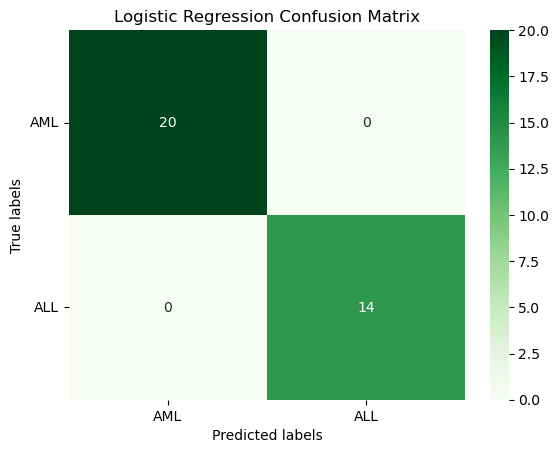

In [19]:
# confusion matrix
cm_log =  confusion_matrix(y_test.iloc[:,1], log_pred)

ax = plt.subplot()
sns.heatmap(cm_log, annot=True, ax = ax, fmt='g', cmap='Greens') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)
plt.show()

**Calculation of classification model evaluation measurments from confusion matrix**

**1. classification report manually**

In [20]:
accuracy = (cm_log[0, 0] + cm_log[1, 1]) / np.sum(cm_log)
print("Accuracy of the classification model is: ", round(accuracy, 3))
error_rate = 1 - accuracy
print("Error rate of the classification model is: ", round(error_rate, 3))
precision_AML = cm_log[0, 0] / (cm_log[0, 0] + cm_log[1, 0])
print("Precision of the classification model in predicting AML patients is: ", round(precision_AML, 3))
precision_ALL = cm_log[1, 1] / (cm_log[1, 1] + cm_log[0, 1])
print("Precision of the classification model in predicting ALL patients is: ", round(precision_ALL, 3))
recall_AML = cm_log[0, 0] / (cm_log[0, 0] + cm_log[0, 1])
print("Recall of the classification model in predicting AML patients is: ", round(recall_AML, 3))
recall_ALL = cm_log[1, 1] / (cm_log[1, 1] + cm_log[1, 0])
print("Recall of the classification model in predicting ALL patients is: ", round(recall_ALL, 3))
F_measure_AML = 2 * cm_log[0, 0] / (2 * cm_log[0, 0] + cm_log[1, 0] + cm_log[0, 1])
print("F-measure of the classification model in predicting AML patients is: ", round(F_measure_AML, 3))
F_measure_ALL = 2 * cm_log[1, 1] / (2 * cm_log[1, 1] + cm_log[0, 1] + cm_log[1, 0])
print("F-measure of the classification model in predicting ALL patients is: ", round(F_measure_ALL, 3))

Accuracy of the classification model is:  1.0
Error rate of the classification model is:  0.0
Precision of the classification model in predicting AML patients is:  1.0
Precision of the classification model in predicting ALL patients is:  1.0
Recall of the classification model in predicting AML patients is:  1.0
Recall of the classification model in predicting ALL patients is:  1.0
F-measure of the classification model in predicting AML patients is:  1.0
F-measure of the classification model in predicting ALL patients is:  1.0


**2. classification report using sklearn**

In [21]:
target_names = ['AML Patients', 'ALL Patients']
print(classification_report(y_test['cancer'].values, log_pred, target_names=target_names))

              precision    recall  f1-score   support

AML Patients       1.00      1.00      1.00        20
ALL Patients       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



**3. precision-recall graph**

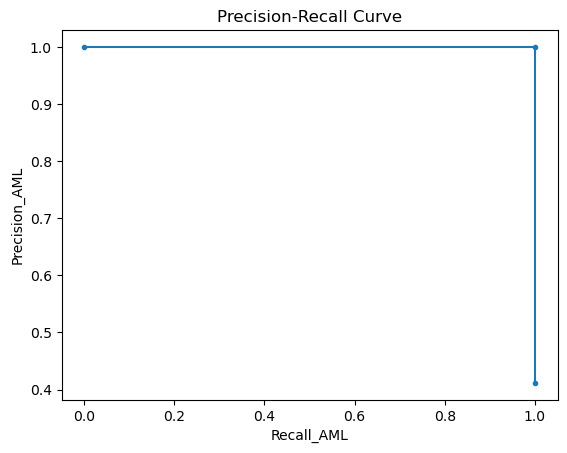

In [22]:
precision, recall, thresholds = precision_recall_curve(y_test['cancer'].values, log_pred)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall_AML')
plt.ylabel('Precision_AML')
plt.title('Precision-Recall Curve')
plt.show()

**4. ROC curve**

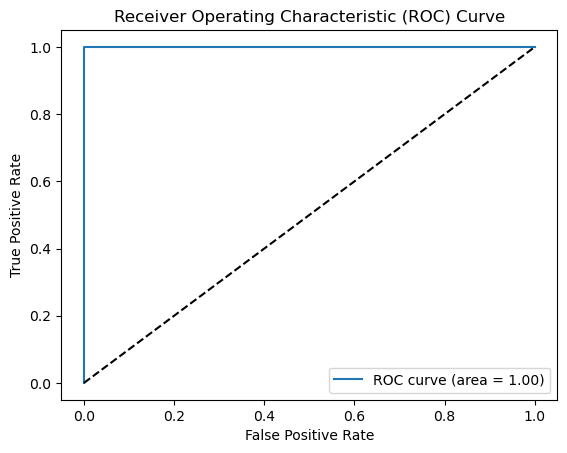

In [23]:
fpr, tpr, thresholds = roc_curve(y_test['cancer'].values, log_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()